In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
import yfinance as yf
import datetime as dt
from datetime import date
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
      data = yf.download(ticker, START, TODAY)
      data.reset_index(inplace=True)
      return data

data = load_data('GOOG')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.074965,26.168653,26.490770,26.133251,26.378078,28951268
1,2015-01-05,25.531416,25.623152,26.144720,25.582764,26.091366,41196796
2,2015-01-06,24.939671,25.029282,25.738087,24.983908,25.679497,57998800
3,2015-01-07,24.896944,24.986401,25.292759,24.914099,25.280592,41301082
4,2015-01-08,24.975443,25.065184,25.105074,24.482782,24.831326,67071641


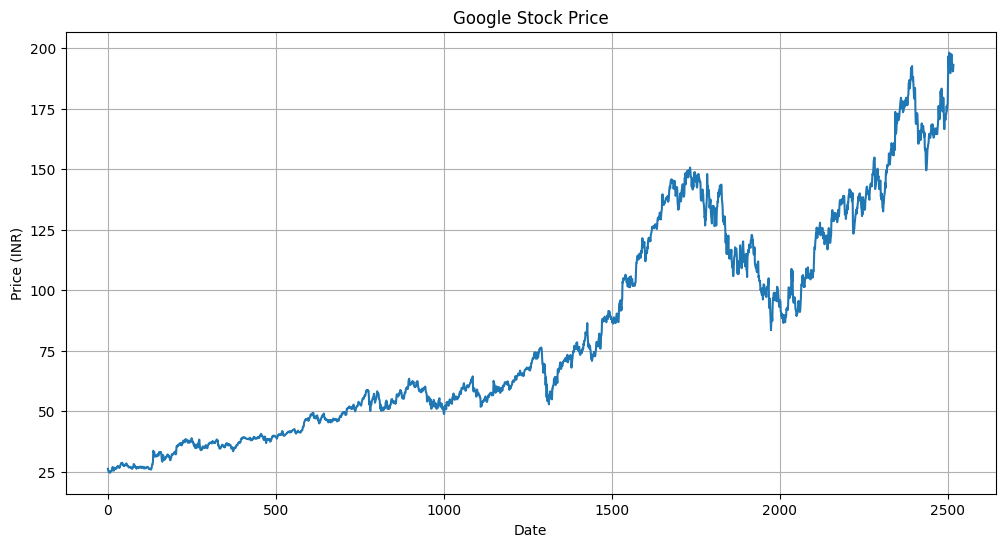

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Google Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [71]:
train = pd.DataFrame(data[:int(len(data)*0.7)])
test=pd.DataFrame(data[int(len(data)*0.7):])

print(train.shape)
# type(train) dataframe

(1762, 7)


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_close=train.iloc[:,4:5].values
test_close=test.iloc[:,4:5].values

print(train_close.shape)
print(test_close.shape)

(1762, 1)
(756, 1)


In [73]:
data_training_array=scaler.fit_transform(train_close)
data_training_array.shape
# //preprocessed

(1762, 1)

In [74]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

print("X shape : ", x_train.shape)
print("Y shape : ", y_train.shape)

X shape :  (1662, 100, 1)
Y shape :  (1662,)


In [75]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [76]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
import tensorflow as tf
model.compile(optimizer='adam', loss='mean_squared_error' , metrics=['MAE'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - MAE: 0.1667 - loss: 0.0612
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - MAE: 0.0527 - loss: 0.0063
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - MAE: 0.0493 - loss: 0.0058
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - MAE: 0.0497 - loss: 0.0053
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - MAE: 0.0426 - loss: 0.0039
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - MAE: 0.0406 - loss: 0.0039
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - MAE: 0.0424 - loss: 0.0043
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - MAE: 0.0389 - loss: 0.0037
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - MAE: 0.0483 - loss: 0.0046
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - MAE: 0.0376 - loss: 0.0032
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - MAE: 0.0378 - loss: 0.0032
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - MAE: 0.0360 - loss: 0.0031
Epoch 13/50
5

In [89]:
model.save('keras_model_final.keras')

In [90]:
test_close.shape

(756, 1)

In [91]:
pasthundreddays=pd.DataFrame(train_close[-100:])


In [92]:
test_df=pd.DataFrame(test_close)

In [93]:
finaldf=pd.concat([pasthundreddays,test_df],ignore_index=True)
print(finaldf.shape)


(856, 1)


In [94]:
input_data=scaler.fit_transform(finaldf)
# input_data

In [95]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [96]:
y_pred_1=model.predict(x_test)
print(y_pred_1.shape)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step
(756, 1)


In [97]:
from sklearn.metrics import mean_squared_error, r2_score
actual = y_test
predicted = y_pred_1
mse = mean_squared_error(actual, predicted)
r2 = r2_score(actual, predicted)
print("Predicted by 100 days timestamps : ")
print(f"mean square error for 100 days : {mse}")
print(f"r2 score by 100 days prediction : {r2}")

Predicted by 100 days timestamps : 
mean square error for 100 days : 0.003771863501503389
r2 score by 100 days prediction : 0.9369323973228894


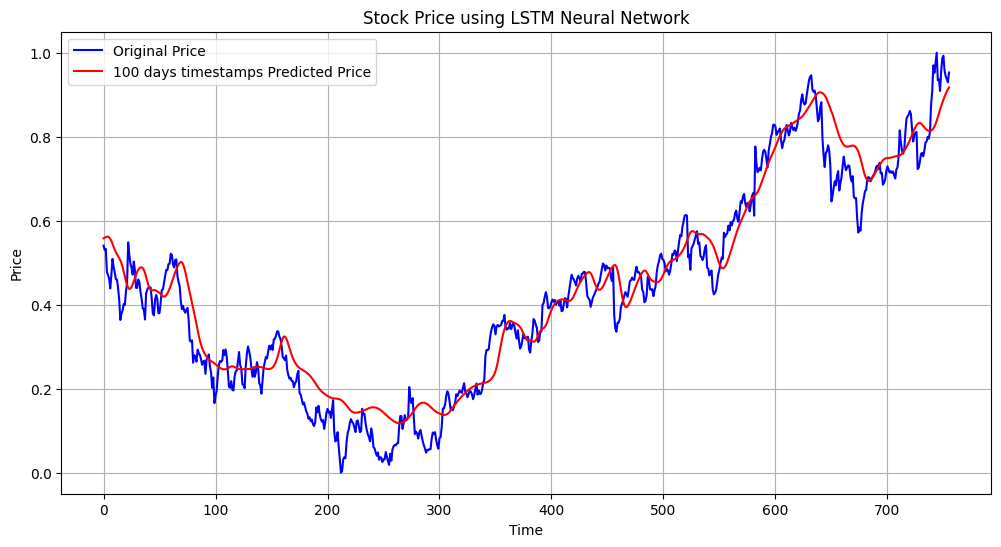

In [98]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred_1, 'r', label = "100 days timestamps Predicted Price")
plt.title('Stock Price using LSTM Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()